In [38]:
# local
# The cache directories:
cache_path       = '/Users/jh7685/Documents/Github/hcp-annot-vc-data/'
image_cache_path = f'{cache_path}/annot-images'
v123_cache_path  = f'{cache_path}/annot-v123'
csulc_cache_path = f'{cache_path}/annot-csulc'
trace_dir = f'{cache_path}/hcp-annot-vc/save'
labels_path = f'{cache_path}/results/labels'
path_cache_dir = '/Volumes/server/Projects/annot-vc/derivatives/path_files'

In [43]:
# tapas
# The cache directories:
cache_path       = '/data/crcns2021'
image_cache_path = f'{cache_path}/annot-images'
v123_cache_path  = f'{cache_path}/annot-v123'
csulc_cache_path = f'{cache_path}/annot-csulc'
trace_dir = f'/data/crcns2021/results/data_branch/save'
labels_path = f'{cache_path}/results/labels'
path_cache_dir = f'{cache_path}/results/average'


In [108]:
import os
os.environ['HCPANNOT_LOAD_PATH'] = cache_path # if you're not using /data
import sys
sys.path.append('..')
from visualization import plot_contours as viscontours
import neuropythy as ny
import numpy as np
import itertools
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## figure setting
For some reason the only font family I could found was serif.

In [4]:
import pylab as pl
la = pl.matplotlib.font_manager.FontManager()
lu = pl.matplotlib.font_manager.FontProperties(family = 'Helvetica')
la.findfont(lu)

'/System/Library/Fonts/Helvetica.ttc'

In [31]:
import matplotlib as mpl
# Additional matplotlib preferences:
font_data = {'size': 10,
             'weight': 'light',
            'family': 'monospace'} # missing fonts 
mpl.rc('font', **font_data) 
# we want relatively high-res images, especially when saving to disk.
mpl.rcParams['figure.dpi'] = 72 * 2
mpl.rcParams['savefig.dpi'] = 72 * 4

In [32]:
# Now we can import the hcp-annot-vc library.
import hcpannot
hcpannot.interface.default_load_path = cache_path
from hcpannot import (vc_plan)

In [106]:
rater_list = ['BrendaQiu',
              'bogengsong',
              'JiyeongHa',
              'lindazelinzhao',
              'nourahboujaber',
              'jennifertepan']
roi_list = ['hV4','VO1','VO2']
hemi_list = ['lh','rh']


## Helper functions for plotting mean contours across subjects

In [34]:
rater='JiyeongHa'
sid=100610
hemi='lh'
roi='VO1'
n_points=500
path_cache_file = os.path.join(path_cache_dir, f"contour-path_space-fsaverage_rater-{rater}_sid-{sid}_hemi-{hemi}_roi-{roi}_npoints-{n_points}.mgz")

In [39]:
subj_ids = viscontours.get_trace_list_drawn_by_rater(trace_dir, '*', '*', '*')

# Plot

had to fork neuropythy & git clone the fork and pip install -e . and then edit all np.object to object.
Downgrading numpy==1.25.5 or the version listed on the neuropythy document was not successful due to another error on the top importing ipython-related packages

In [36]:
viscontours.make_path(rater,
                      hemi,
                      roi,
                      sid,
                      n_points,
                      trace_dir=trace_dir,
                      save_path=path_cache_file,
                      verbose=False)

subject no. 100610 is finished! Elapsed time: 0.02 sec


(array([28.716133 , 28.047285 , 27.509485 , 27.139856 , 26.456978 ,
        25.86715  , 25.176567 , 24.53049  , 24.212044 , 23.866732 ,
        23.438051 , 23.115358 , 22.726677 , 22.211897 , 21.667162 ,
        20.80927  , 20.271204 , 19.787764 , 18.842323 , 18.454632 ,
        17.665775 , 16.9747   , 16.047482 , 15.418805 , 14.585083 ,
        13.646557 , 12.625716 , 11.861919 , 10.57195  ,  9.814644 ,
         9.57958  ,  9.393345 ,  8.849667 ,  8.845289 ,  8.325725 ,
         7.9285736,  7.432457 ,  6.9837193,  6.5512524,  6.458057 ,
         6.4813256,  6.5945635,  6.6349244,  6.670762 ,  6.6491766,
         6.6819515,  6.681299 ,  6.642136 ,  6.5819426,  6.516639 ,
         6.5386715,  6.55858  ,  6.5531054,  6.547739 ,  6.519722 ,
         6.3902903,  6.2118797,  6.101578 ,  5.972906 ,  5.9059677,
         5.6695185,  6.237451 ,  7.153712 ,  8.2483   ,  9.08021  ,
        10.311436 , 10.822657 , 11.509912 , 11.796334 , 12.217124 ,
        12.54586  , 12.954215 , 13.421989 , 13.5

In [ ]:
for rater, hemi, roi in itertools.product(rater_list, hemi_list, roi_list):
    path_list = glob(os.path.join(path_cache_dir, f'contour-path_space-fsaverage_rater-{rater}*sid-*{hemi}_roi-{roi}_npoints-{n_points}.mgz'))


In [140]:
mean_x,mean_y,iqr_xy = {},{},{}
for rater, roi in itertools.product(rater_list, roi_list):
    path_list = glob(os.path.join(path_cache_dir, f'contour-path_space-fsaverage_rater-{rater}*sid-*lh_roi-{roi}_npoints-{n_points}.mgz'))
    sids_list = [int(k.split('sid-')[1][:6]) for k in path_list]
    x_list, y_list = [], []
    for f in path_list:
        sid = int(f.split('sid-')[1][:6])
        x, y = ny.load(f)
        x_list.append(x)
        y_list.append(y)
    dict_key = f'{rater}-{roi}'
    mean_x[dict_key] = np.mean(x_list, axis=0)
    mean_y[dict_key] = np.mean(y_list, axis=0)
    iqr_xy[dict_key] = viscontours.calculate_IQR_summary(x_list, y_list, axis=0)


In [200]:
(np.linspace(0,1,3))

array([0. , 0.5, 1. ])

In [204]:
colors = plt.get_cmap('Set1', 10)(np.asarray([0.0, 0.1, 0.2]))
colors = np.tile(colors, (len(rater_list),1))

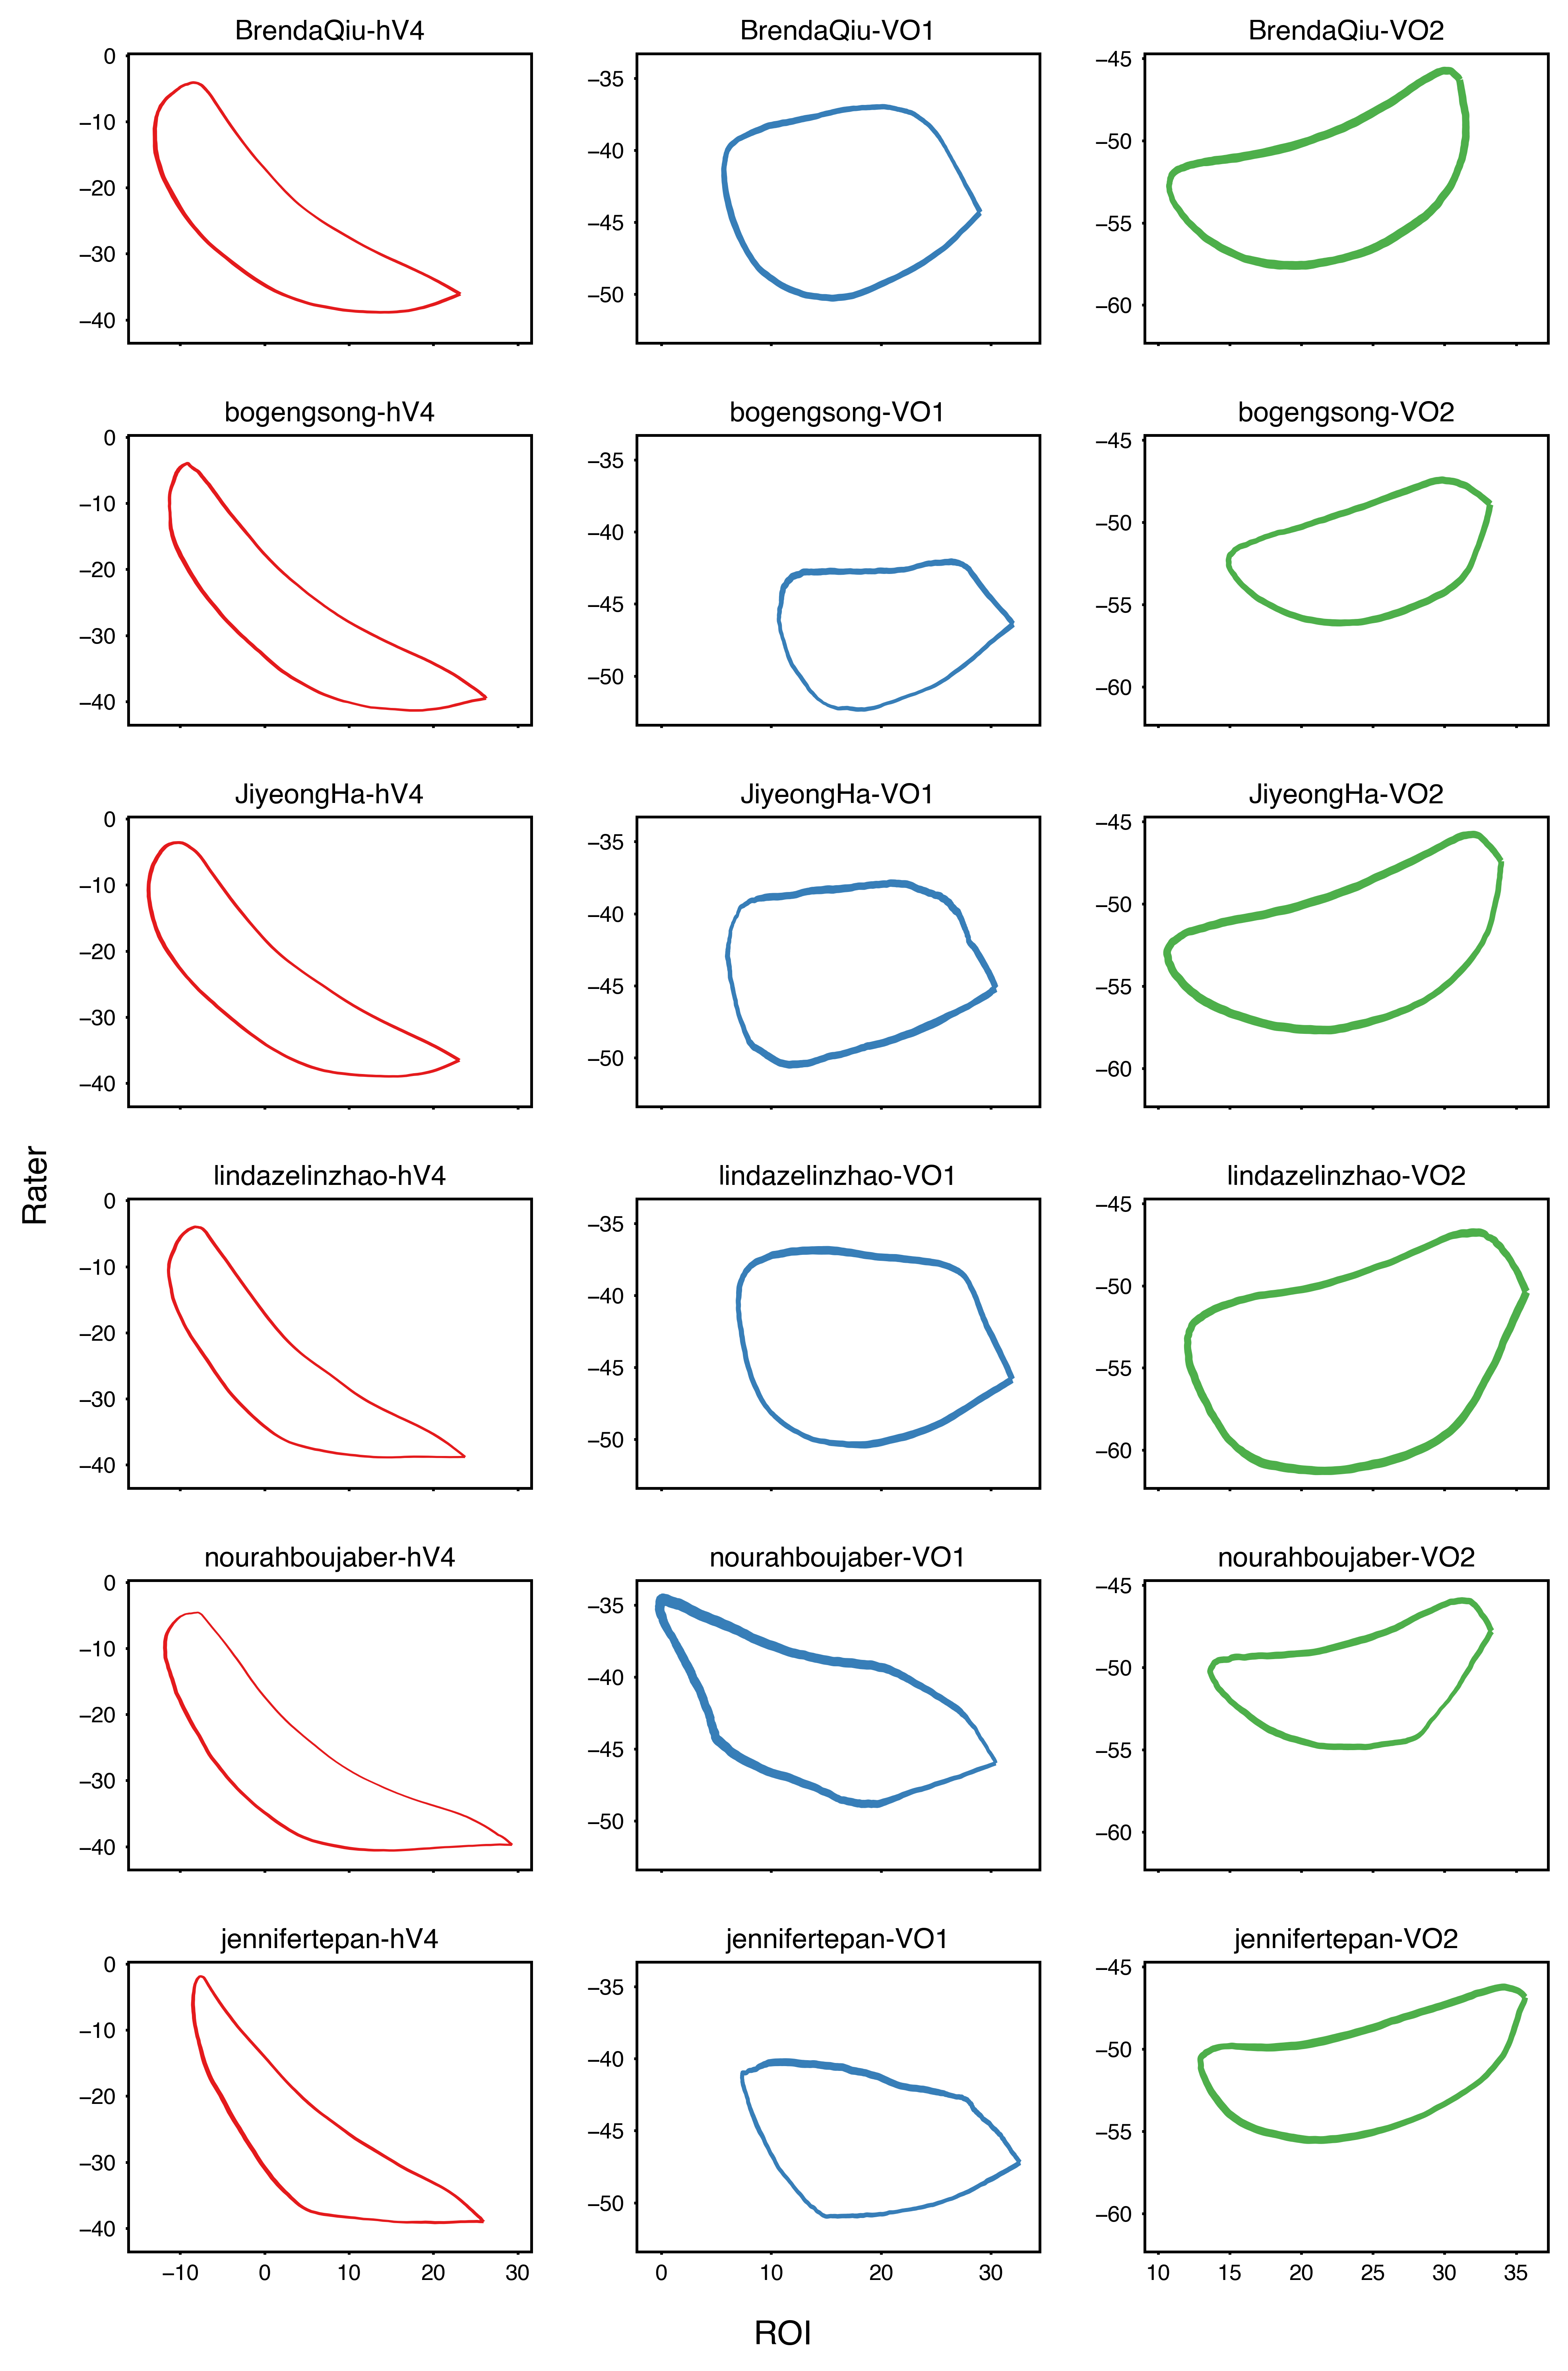

In [207]:
rc = {'xtick.bottom': True,
      'xtick.labelbottom': True,
      'xtick.major.size': 1,
      'xtick.major.width': 1,
      'xtick.labelsize': 8,
      'ytick.left': True,
      'ytick.labelleft': True,
      'ytick.major.size': 1,
      'ytick.major.width': 1,
      'ytick.labelsize': 8,
      'font.family': 'Helvetica',
      'axes.linewidth': 1,
      'axes.titlesize': 10,
      'axes.titlepad': 5,
      'axes.titleweight': "bold",
      }
viscontours.set_rcParams(rc)
fig, axes = plt.subplots(len(rater_list), len(roi_list),
                         sharex='col',sharey='col',
                         dpi=500, figsize=(8, 12))
for dict_key, (i, ax) in zip(mean_x.keys(), enumerate(axes.flatten())):
    viscontours.lwplot(mean_x[dict_key], mean_y[dict_key],
                       axes=ax, color=colors[i],
                       lw=iqr_xy[dict_key] * 0.02)
    ax.set_title(dict_key)
fig.supxlabel('ROI', fontsize=12)
fig.supylabel('Rater', fontsize=12)
plt.tight_layout(w_pad=2, h_pad=2)
plt.savefig('/Volumes/server/Projects/annot-vc/derivatives/figures/rater-all_roi-all.svg',
            bbox_inches='tight', transparent=True)

In [211]:
roi_mean_x, roi_mean_y, roi_iqr_xy = {},{},{}
for roi in roi_list:
    path_list = glob(os.path.join(path_cache_dir, f'contour-path_space-fsaverage_rater-*lh_roi-{roi}_npoints-{n_points}.mgz'))
    sids_list = [int(k.split('sid-')[1][:6]) for k in path_list]
    x_list, y_list = [], []
    for f in path_list:
        sid = int(f.split('sid-')[1][:6])
        x, y = ny.load(f)
        x_list.append(x)
        y_list.append(y)
    dict_key = f'{roi}'
    roi_mean_x[dict_key] = np.mean(x_list, axis=0)
    roi_mean_y[dict_key] = np.mean(y_list, axis=0)
    roi_iqr_xy[dict_key] = viscontours.calculate_IQR_summary(x_list, y_list, axis=0)


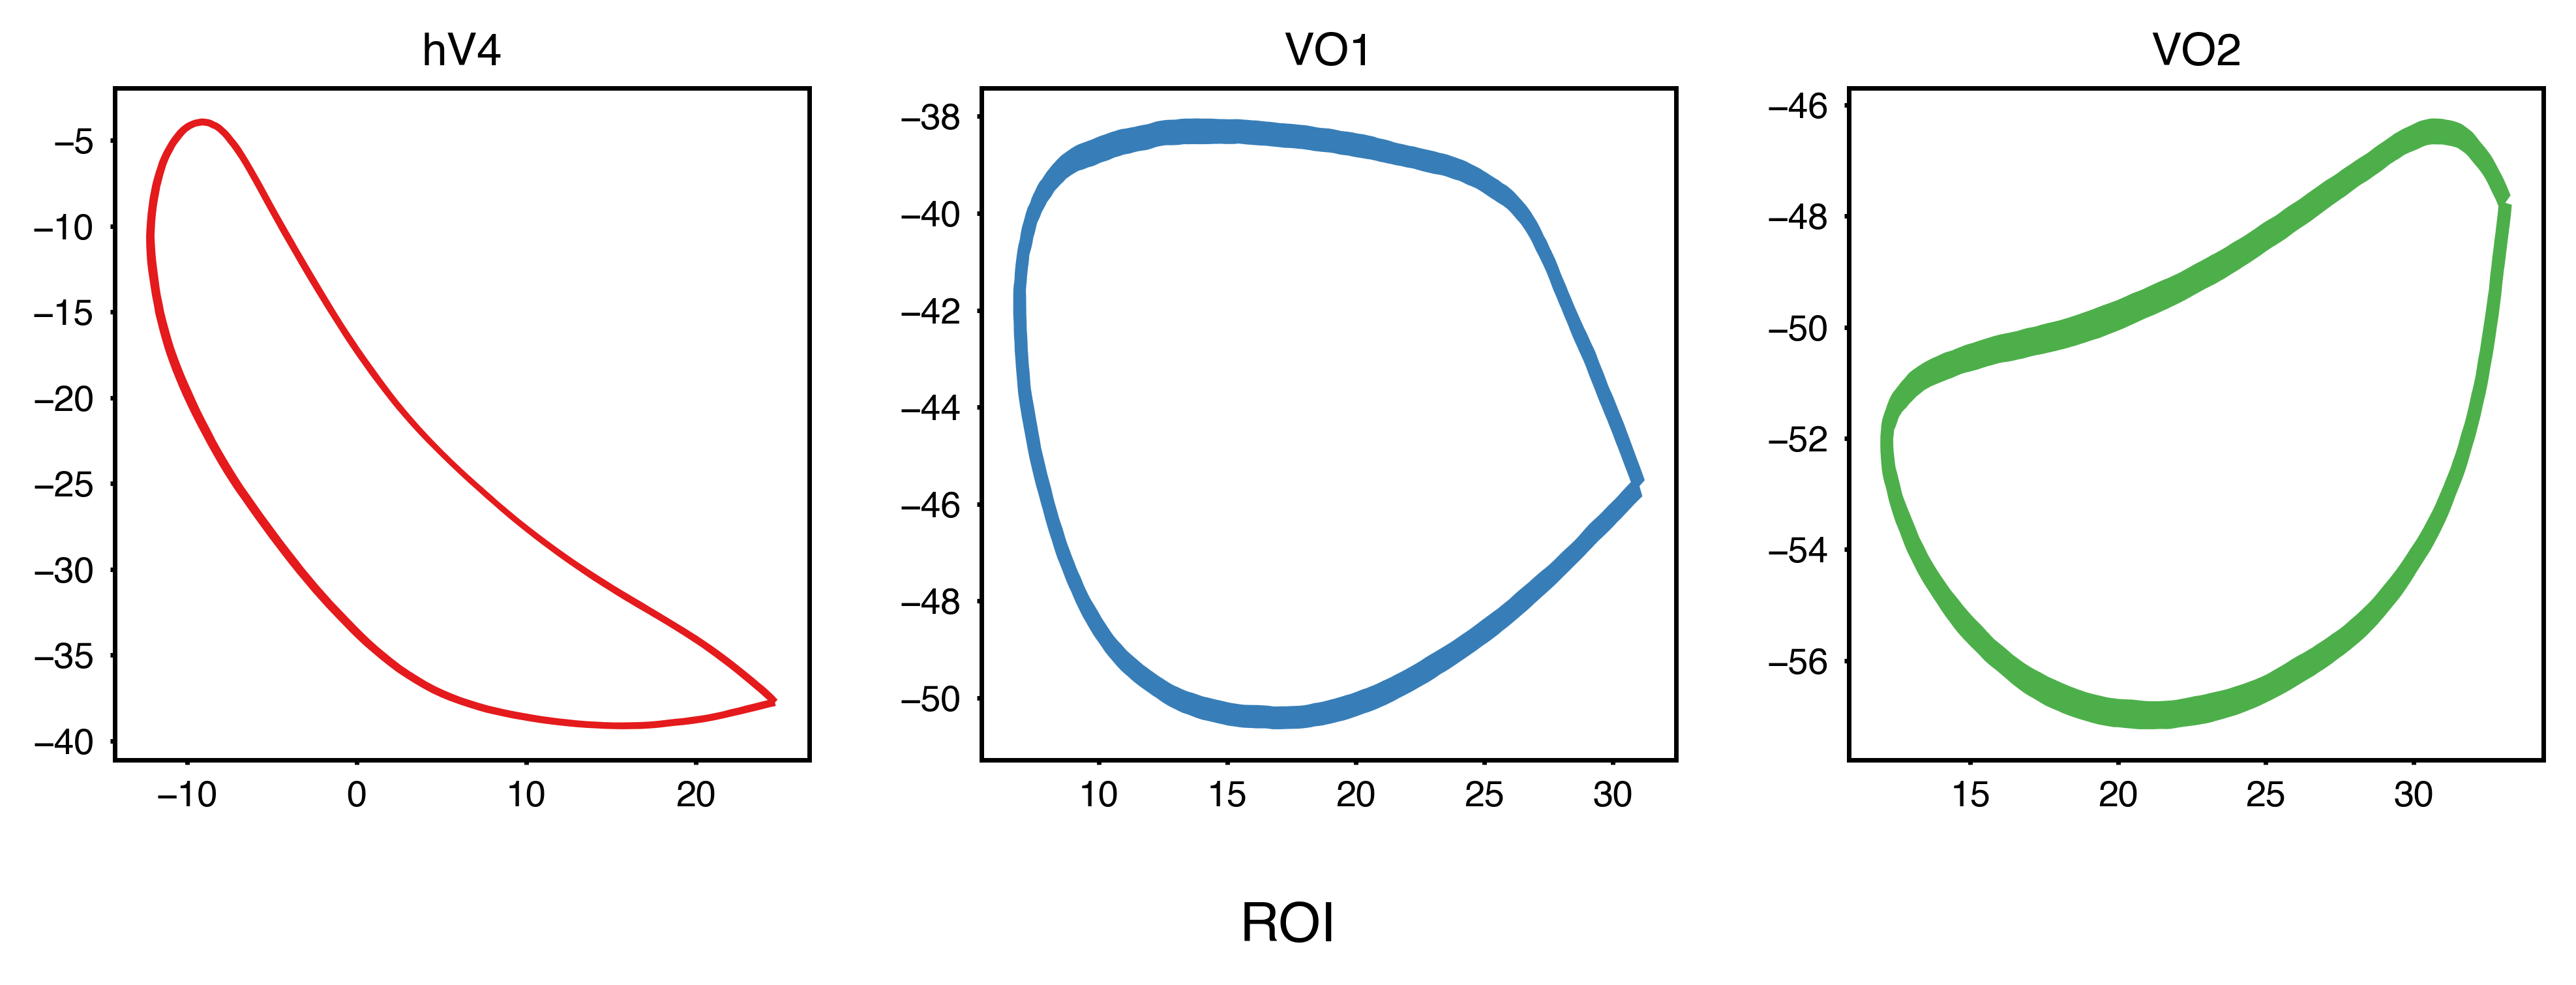

In [215]:
fig, axes = plt.subplots(1, len(roi_list),
                         sharex='col',sharey='col',
                         dpi=500, figsize=(8, 3))
for dict_key, (i, ax) in zip(roi_mean_x.keys(), enumerate(axes.flatten())):
    viscontours.lwplot(roi_mean_x[dict_key], roi_mean_y[dict_key],
                       axes=ax, color=colors[i],
                       lw=roi_iqr_xy[dict_key] * 0.02)
    ax.set_title(dict_key)
fig.supxlabel('ROI', fontsize=12)
plt.tight_layout(w_pad=2, h_pad=2)
plt.savefig('/Volumes/server/Projects/annot-vc/derivatives/figures/rater-avg_roi-all.svg',
            bbox_inches='tight', transparent=True)

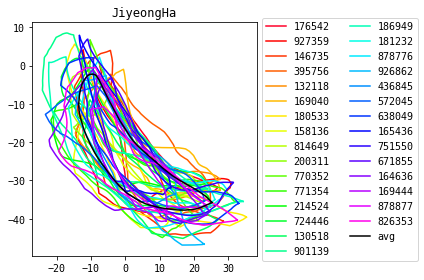

In [39]:
fig, axes = plt.subplots(1,3)

## Plot

## for savings..